# Generate Music wooooow

## Prepare The data
The dataset has been found on Kaggle : https://www.kaggle.com/datasets/soumikrakshit/classical-music-midi/

### create a list with all the midi files

In [1]:
import os

midis = []

directory = "data"
for foldername in os.listdir(directory):
    directory = os.path.join("data", foldername)
    for filename in os.listdir(directory):  
        if os.path.isfile(os.path.join(directory, filename)):
            midis.append(os.path.join(directory, filename))
            # print(filename)

print(midis[:5])

['data\\albeniz\\alb_esp1.mid', 'data\\albeniz\\alb_esp1V2.mid', 'data\\albeniz\\alb_esp2.mid', 'data\\albeniz\\alb_esp2V2.mid', 'data\\albeniz\\alb_esp3.mid']


In [2]:
print(len(midis))

590


In [5]:
import mido

file = mido.MidiFile(r'data\albeniz\alb_esp2.mid')

track = file.tracks[1]

# Iterate over all the messages in the track and remove all messages that are not notes
for message in track:
    # print(f'\t{message.type}: {message.dict()}')
    if(message.type != 'note_on' and message.type != 'note_off'):
        # print(f'\t{message.dict()}')
        track.remove(message)
        
for message in track:
    if(message.type == 'note_on'): print(f'{message.type}: {message.dict()}')
    

note_on: {'type': 'note_on', 'time': 360, 'note': 57, 'velocity': 49, 'channel': 0}
note_on: {'type': 'note_on', 'time': 120, 'note': 57, 'velocity': 0, 'channel': 0}
note_on: {'type': 'note_on', 'time': 0, 'note': 69, 'velocity': 55, 'channel': 0}
note_on: {'type': 'note_on', 'time': 0, 'note': 66, 'velocity': 49, 'channel': 0}
note_on: {'type': 'note_on', 'time': 0, 'note': 62, 'velocity': 49, 'channel': 0}
note_on: {'type': 'note_on', 'time': 480, 'note': 62, 'velocity': 0, 'channel': 0}
note_on: {'type': 'note_on', 'time': 0, 'note': 66, 'velocity': 0, 'channel': 0}
note_on: {'type': 'note_on', 'time': 0, 'note': 69, 'velocity': 0, 'channel': 0}
note_on: {'type': 'note_on', 'time': 360, 'note': 57, 'velocity': 46, 'channel': 0}
note_on: {'type': 'note_on', 'time': 120, 'note': 57, 'velocity': 0, 'channel': 0}
note_on: {'type': 'note_on', 'time': 0, 'note': 62, 'velocity': 48, 'channel': 0}
note_on: {'type': 'note_on', 'time': 0, 'note': 66, 'velocity': 48, 'channel': 0}
note_on: {'

Theory : the track 0 is for the tempos and rhythms.

The track 1 is for the right hand and the track 2 is for the left hand

In [6]:
import numpy as np

notes = []
print(notes)
for i in range(len(file.tracks)):
    notes.append(np.array([message.note for message in file.tracks[i] if message.type == 'note_on']))

# print(notes)
print(list(len(nts) for nts in notes))
print(list(nts.mean() for nts in notes))

[]
[0, 854, 506, 0, 0, 0, 0, 0]
[nan, 68.70257611241217, 52.3201581027668, nan, nan, nan, nan, nan]


C:\Users\lorra\AppData\Local\Temp\ipykernel_12852\1373258131.py:10: RuntimeWarning: Mean of empty slice.
  print(list(nts.mean() for nts in notes))
c:\Users\lorra\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Let's now create a midi file while removing all the parts that i think are useless, (to check if they're indeed useless xD)

In [8]:
def createMidiFileWithAllMessages(notes, starts, velocity, fileName):
    file = mido.MidiFile()

    track = mido.MidiTrack()
    file.tracks.append(track)

    for i in range(len(notes)):
        # print(notes[n][i], starts[n][i], velocity[n][i])
        
        track.append(mido.Message('note_on', note=notes[i], velocity=velocity[i], time=starts[i]))
        
    file.save(fileName)

In [9]:
print(file.tracks[1][8].dict())
print(file.tracks[1][9].dict())
print(file.tracks[1][10].dict())

{'type': 'note_on', 'time': 480, 'note': 62, 'velocity': 0, 'channel': 0}
{'type': 'note_on', 'time': 0, 'note': 66, 'velocity': 0, 'channel': 0}
{'type': 'note_on', 'time': 0, 'note': 69, 'velocity': 0, 'channel': 0}


In [10]:
notes = [] 
starts = []
velocities = []
params = [notes, starts, velocities]

for i in range(len(file.tracks)):
    notes.append(np.array([message.note for message in file.tracks[i] if message.type == 'note_on'], dtype=int))
    starts.append(np.array([message.time for message in file.tracks[i] if message.type == 'note_on'], dtype=int))
    velocities.append(np.array([message.velocity for message in file.tracks[i] if message.type == 'note_on'], dtype=int))

# jarrive pas à le faire en une ligne aled
for p in params:
    for l in p:
        if(len(l) == 0):
            p.remove(l)

createMidiFileWithAllMessages(notes, starts, velocities, "testWithTracks1And2.mid", 2)

ValueError: operands could not be broadcast together with shapes (854,) (0,) 

Let's now resume everything in one big function : 

the function will take a path and a name in input, and will create a new midi file by removing the useless tracks

In [82]:
import matplotlib.pyplot as plt

def CreateMidiFile(path, name):
    # define the file 
    file = mido.MidiFile(path)
    print(path)
    
    track = file.tracks[1]
        
    # Iterate over all the messages in the track
    messages = []
    for message in track:
        print(f'\t{message.type}: {message.dict()}')
        if(message.type == 'note_on' or message.type == 'note_off'):
            # print(f'\t{message.dict()}')
            messages.append(message)
            # track.remove(message)

            
    # for message in track:
    #     # print(f'\t{message.type}: {message.dict()}' if message.type == 'note_on' else '')
    #     print(f'\t{message.type}: {message.dict()}')
    
    # remove all the useless tracks
    
    # creating the new file
    
    notes = [] 
    starts = []
    velocities = []
    params = [notes, starts, velocities]

    # catching all the parameters
    for i in range(len(file.tracks)):
        notes.append([message.note for message in messages if message.type == 'note_on'])
        starts.append([message.time for message in messages if message.type == 'note_on'])
        velocities.append([message.velocity for message in messages if message.type == 'note_on'])

    # jarrive pas à le faire en une ligne aled
    # removing the parameters with no values (tracks with no notes)
    for p in params:
        print([len(l) for l in p])
        for l in p:
            # print('\t',l[:10])
            # print('\t',len(l))
            if(len(l) == 0):
                p.remove(l)
        print([len(l) for l in p])

    plt.plot(starts[0][0:len(starts[1])], starts[1], 'ro')


    # creating the new file
    createMidiFileWithAllMessages(notes, starts, velocities, name, len(notes))

In [ ]:
CreateMidiFile(r'data\albeniz\alb_esp1.mid', "testWithTracks1And2V2.mid")

data/albeniz/alb_esp3.mid
Track 0: (len : 799
	track_name: {'type': 'track_name', 'name': 'Espana Op. 165', 'time': 0}
	track_name: {'type': 'track_name', 'name': 'Malaguena', 'time': 0}
	copyright: {'type': 'copyright', 'text': 'Copyright © 2001 by Bernd Krueger', 'time': 0}
	text: {'type': 'text', 'text': 'Isaac Albeniz', 'time': 0}
	text: {'type': 'text', 'text': 'Allegretto', 'time': 0}
	text: {'type': 'text', 'text': 'Fertiggestellt am 28.01.2001\n', 'time': 0}
	text: {'type': 'text', 'text': 'Normierung: 23.12.2002\n', 'time': 0}
	text: {'type': 'text', 'text': 'Update am 30.8.2010\n', 'time': 0}
	text: {'type': 'text', 'text': 'Dauer: 2:56  Minuten\n', 'time': 0}
	smpte_offset: {'type': 'smpte_offset', 'frame_rate': 30, 'hours': 0, 'minutes': 0, 'seconds': 3, 'frames': 0, 'sub_frames': 0, 'time': 0}
	time_signature: {'type': 'time_signature', 'numerator': 3, 'denominator': 8, 'clocks_per_click': 12, 'notated_32nd_notes_per_beat': 8, 'time': 0}
	key_signature: {'type': 'key_signa

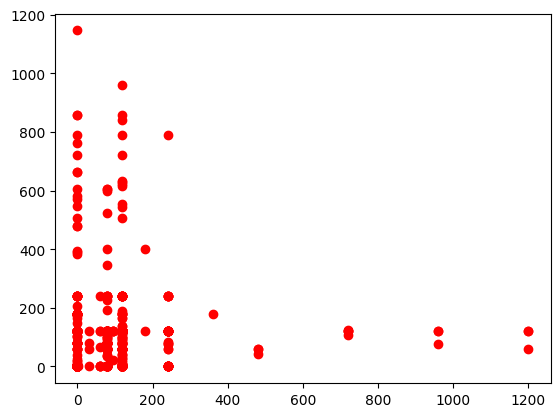

In [83]:
CreateMidiFile('data/albeniz/alb_esp3.mid', "camarchepas.mid")

In [35]:
li = list(range(0, 20, 2))
print(li)
for i,l in enumerate(li):
    # print(l)
    if(l == 6):
        li.remove(l)
print(li)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
[0, 2, 4, 8, 10, 12, 14, 16, 18]


## Convert midi files to tokens

In [62]:
# remove the useless tracks for all the files
def createAllMidiFilesV2():
    newMidis = []

    for midi in midis:
        newMidis.append(midi.split('.')[0] + "V2.mid")
        CreateMidiFile(midi, midi.split('.')[0] + "V2.mid") 
        
    return newMidis
    
    
# midis = createMidiFileWithAllMessages()
print(midis[:5])

['data\\albeniz\\alb_esp1V2.mid', 'data\\albeniz\\alb_esp2V2.mid', 'data\\albeniz\\alb_esp3V2.mid', 'data\\albeniz\\alb_esp4V2.mid', 'data\\albeniz\\alb_esp5V2.mid']


In [13]:
# count all the messages

messages = []

for path in midis:
    file = mido.MidiFile(path)
    for mess in file.tracks[1]:
        messages.append(mess)
    for mess in file.tracks[2]:
        messages.append(mess)
    
print(messages[:10])

[MetaMessage('track_name', name='Piano right', time=0), Message('program_change', channel=0, program=0, time=0), Message('control_change', channel=0, control=7, value=100, time=0), Message('control_change', channel=0, control=10, value=64, time=0), MetaMessage('text', text='bdca426d104a26ac9dcb070447587523', time=0), Message('control_change', channel=0, control=91, value=127, time=0), Message('control_change', channel=0, control=64, value=0, time=0), Message('note_on', channel=0, note=81, velocity=60, time=240), Message('note_on', channel=0, note=81, velocity=0, time=240), Message('note_on', channel=0, note=88, velocity=66, time=0)]


In [14]:
print(len(messages))

1433716
